<a href="https://colab.research.google.com/github/ticapix/gaia-x-notebooks/blob/main/Gaia-X_Compliance_24.04-Extract_Criteria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extract criteria from Gaia-X Compliance 24.04-prerelease

In [1]:
from bs4 import BeautifulSoup
import requests
import json
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Extract and load all criteria

In [2]:
 # compliance document url
compliance_criteria_url = "https://docs.gaia-x.eu/policy-rules-committee/compliance-document/24.04-prerelease/criterions/"

# fetch the page
compliance_criteria_html = requests.get(compliance_criteria_url)

# parse the page
compliance_criteria = BeautifulSoup(compliance_criteria_html.text)

# extract criteria
criteria = []
for criterion in compliance_criteria.find_all('span', {"class":"criteria-data"}):
    criteria.append(json.loads(criterion.text))

print(f"found {len(criteria)} criteria")

found 63 criteria


## Criteria distribution

In [26]:
# string values come from https://gitlab.com/gaia-x/policy-rules-committee/compliance-document/-/blob/main/fence_criteria/block.py?ref_type=heads#L48
scheme = ['conformity', 'labelL1', 'labelL2', 'labelL3']
types = ["declaration", "certification", "N/A"]
df = pd.DataFrame([[0] * 3] * 4, scheme, types)

for criterion in criteria:
    df.loc[scheme[0], criterion[scheme[0]]] += 1
    df.loc[scheme[1], criterion[scheme[1]]] += 1
    df.loc[scheme[2], criterion[scheme[2]]] += 1
    df.loc[scheme[3], criterion[scheme[3]]] += 1
print(df.head())

            declaration  certification  N/A
conformity           47              0   16
labelL1              53              0   10
labelL2              19             35    9
labelL3              17             40    6


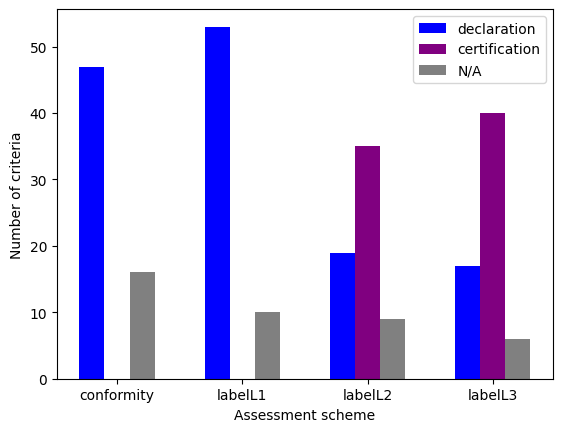

In [27]:
plt.cla()
plt.clf()
# from https://datagy.io/matplotlib-bar-charts/
xlabels = list(df.index)
x = np.arange(len(xlabels))
width = 0.2
# plot data in grouped manner of bar type
plt.bar(x-width, list(df[types[0]]), width, color='blue')
plt.bar(x, list(df[types[1]]), width, color='purple')
plt.bar(x+width, list(df[types[2]]), width, color='grey')
plt.xticks(x, xlabels)
plt.xlabel("Assessment scheme")
plt.ylabel("Number of criteria")
plt.legend(types)
plt.show()

In [56]:
# @title Select the conformity scheme to list. { run: "auto" }
scheme_selected = "conformity" # @param ['conformity', 'labelL1', 'labelL2', 'labelL3']
print(f"You selected {scheme_selected}")
for criterion in criteria:
  if criterion[scheme_selected] != types[2]: # if not N/A
    print(criterion["id"], criterion["criterion"])
    print(criterion["declaration"])
    print("")

You selected conformity
P1.1.1 The Provider shall offer the ability to establish a legally binding act. This legally binding act shall be documented.
Using the Gaia-X Ontology, the declaration shall contain either a resolvable identifier pointing to the legally binding act offered by the Provider or a contact form to request more information.

P1.1.2 The Provider shall have an option for each legally binding act to be governed by EU/EEA/Member State law.
Using the Gaia-X Ontology, the declaration shall contain the list of ISO 3166-2 codes indicating the EU/EEA/Member States whose law may be applied as governing law for the legally binding act.

P1.1.3 The Provider shall clearly identify for which parties the legal act is binding.
The declaration shall include at least one of the following:

  1. Detailed description of the parties using the Gaia-X Ontology.
  2. Use of legally relevant or legally binding cryptographic certificates from the Gaia-X Registry (note: this is not applicable 